# Маркетинговый анализ

Нам необходимо проанализировать данные о посещениях Яндекс.Афиши с июня 2017 до конца мая 2018 года, а также изучить информацию о заказах и рекламных расходах за этот период. Мы исследуем, как клиенты пользуются сайтом, когда совершают первые покупки и сколько денег приносят компании. А также выясним, когда расходы на рекламу начинают окупаться. Эта информация поможет маркетологам скорректировать расходы и перераспределить бюджет. 

## Открытие данных

Импортируем необходимые нам для работы библиотеки и сохраним таблицы:
* *visits* — с данными о посещениях сайта;
* *orders* — с данными о заказах;
* *costs* — с данными о расходах на маркетинг.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#импортируем warnings, чтобы Pandas не выдавал предупреждения
import warnings 
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
#выведем несколько строк таблиц на экран
visits.sample(10, random_state=1)

,Device,End Ts,Source Id,Start Ts,Uid
167589,desktop,2018-01-15 21:12:00,10,2018-01-15 21:06:00,11898993694310850933
299103,desktop,2018-05-09 01:21:00,4,2018-05-09 01:21:00,7218061394456444803
345632,desktop,2018-02-18 20:17:00,3,2018-02-18 20:12:00,5663226520415784959
91779,touch,2018-05-14 16:08:00,4,2018-05-14 16:07:00,10927064994254891814
272577,desktop,2017-12-25 12:34:00,1,2017-12-25 12:15:00,14081765519052754461
117058,desktop,2018-03-25 22:45:00,3,2018-03-25 22:42:00,18134900845074462797
67173,desktop,2017-12-03 21:15:00,4,2017-12-03 21:04:00,2597938318978185937
348213,touch,2017-12-01 11:01:00,1,2017-12-01 10:24:00,5806545115681005098
245510,desktop,2018-04-28 14:11:00,5,2018-04-28 14:08:00,1209933333956484517
124505,desktop,2017-10-20 09:35:00,3,2017-10-20 09:28:00,15136031684291427312


In [4]:
orders.sample(10, random_state=1)

,Buy Ts,Revenue,Uid
7271,2017-09-09 01:29:00,1.10,7674233352595996409
36523,2018-02-23 08:56:00,1.71,8129244829733440960
41828,2018-03-25 16:47:00,1.22,9003018755281849036
39266,2018-03-10 11:51:00,4.28,775704491445963998
10615,2017-10-04 17:31:00,4.58,5139615590553126732
39590,2018-03-12 14:37:00,1.54,17322829838415263008
33831,2018-02-09 22:36:00,2.44,6917790636196771579
8441,2017-09-20 20:11:00,1.34,4195018562480487182
35611,2018-02-18 23:27:00,0.85,17082801536003975717
12989,2017-10-16 10:18:00,1.83,8787007543901122020


In [5]:
costs.sample(10, random_state=1)

,source_id,dt,costs
1481,5,2017-06-30,77.88
1833,9,2017-06-18,9.44
2045,9,2018-01-16,13.90
1785,5,2018-05-01,79.99
1402,4,2018-04-12,160.14
705,2,2018-05-11,82.25
297,1,2018-03-25,87.70
1246,4,2017-11-05,387.64
1742,5,2018-03-18,122.82
1028,3,2018-03-30,39.26


**Вывод**

По таблице *visits* можно сделать предварительный вывод, что чаще всего пользователи проводят на сайте всего несколько минут, реже — более <br>20 минут. Сумма заказа в таблице *orders* чаще не превышает 5 у.е. В то время как расходы на рекламу, судя по данным таблицы *costs*, варьируются гораздо сильнее — в выведенных нами строках суммы расходов на маркетинг находятся в диапазоне от прибл. 9 до 387 у.е.

## Предобработка данных

В предыдущем этапе мы обратили внимание на то, что названия столбцов в таблицах *visits* и *orders* написаны в разных регистрах. Приведем их к единообразию: запишем все заголоки строчными буквами, а также заменим пробелы на нижнее подчеркивание:

In [6]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'})
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'buy ts':'buy_ts'})

#выведем несколько строк для проверки
display(visits.sample(3, random_state=1))
display(orders.sample(3, random_state=1))

,device,end_ts,source_id,start_ts,uid
167589,desktop,2018-01-15 21:12:00,10,2018-01-15 21:06:00,11898993694310850933
299103,desktop,2018-05-09 01:21:00,4,2018-05-09 01:21:00,7218061394456444803
345632,desktop,2018-02-18 20:17:00,3,2018-02-18 20:12:00,5663226520415784959


,buy_ts,revenue,uid
7271,2017-09-09 01:29:00,1.10,7674233352595996409
36523,2018-02-23 08:56:00,1.71,8129244829733440960
41828,2018-03-25 16:47:00,1.22,9003018755281849036


Выясним, есть ли в таблицах пропуски и к каким типам относятся данные:

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В таблице *visits* пропусков нет, но столбцы с информацией о дате и времени начала и конца сессии [start_ts] и [end_ts] нужно привести к формату дат:

In [8]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

#проверим, сработала ли замена
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Проверим, есть ли в таблице ошибочные строки, в которых время начала сессии больше, чем время ее окончания:

In [9]:
visits.query('start_ts > end_ts')

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Нашли две строчки с ошибочными данными, удалим их из таблицы:

In [10]:
#удалим строчки по индексу
visits = visits.drop([4181, 177972]).reset_index(drop=True)

#повторим запрос
visits.query('start_ts > end_ts')

,device,end_ts,source_id,start_ts,uid


Удалили две строчки с ошибочным временем. Проверим, есть ли в этой таблице дубликаты:

In [11]:
visits.duplicated().sum()

0

Повторяющиеся строки отсутствуют. Проверим таблицу *orders*:

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Пропущенных значений нет, но столбец с данными о дате и времени покупки [buy_ts] также нужно привести к формату даты:

In [13]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Проверим минимальную и максимальную даты заказов: 

In [14]:
orders['buy_ts'].min()

Timestamp('2017-06-01 00:10:00')

In [15]:
orders['buy_ts'].max()

Timestamp('2018-06-01 00:02:00')

Максимальная дата относится к июню 2018 года, тогда как в нашей выборке представлены заказы только до конца мая. Удалим строчки, относящиеся к заказам июня 2018 года:

In [16]:
orders = orders.query('buy_ts < "2018-06-01 00:00:00"').reset_index(drop=True)
#проверим максимальное значение столбца
orders['buy_ts'].max()

Timestamp('2018-05-31 23:56:00')

In [17]:
#проверим таблицу на дубликаты
orders.duplicated().sum()

0

В таблице отсутствуют дубликаты. Изучим стандартное отклонение, среднее и другие характерные значения заказов пользователей:

In [18]:
orders['revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Наблюдаем большое значение стандартного отклонения, превышающее среднее более чем в 4 раза. Максимальное значение суммы заказа —<br>2633 у.е., оно больше среднего более чем в 500 раз. При этом среднее значение в два раза больше медианны. Все это говорит о скошенности данных и наличии в этом столбце аномальных значений. 
<br>Удалить эти аномальные значения было бы неправильно, потому как это может исказить итоговые данные. К тому же в слишком высокой стоимости заказа на сайте Яндекс.Афиши нет ничего удивительного, это могут быть, к примеру, билеты на премьеру спектакля или балета.  

При этом обращаем внимание на то, что минимальная сумма заказа равна 0. Проверим, сколько таких строчек в таблице:

In [19]:
orders.loc[orders['revenue'] == 0, 'revenue'].count()

51

В таблице 51 строчка с нулевой стоимостью заказа. Можем удалить их, чтобы не искажать данные при анализе. Оставим в таблице заказы, сумма которых больше нуля:

In [20]:
orders = orders.loc[orders['revenue'] > 0]
orders['revenue'].describe()

count    50363.000000
mean         5.004741
std         21.829038
min          0.010000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Изучим данные в последней таблице:

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропусков нет, но в таблцие также необходимо заменить формат данных в столбце с датой проведения рекламной кампании:

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [23]:
costs.duplicated().sum()

0

Дубликатов в этой таблице нет. Изучим характерные значения столбца с данными о расходах на рекламную кампанию:

In [24]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

В столбце [costs] наблюдаем большой разброс данных: стандартное отклонение составляет 156 при среднем значении в 129. Медиана значительно меньше среднего — это указывает на скошенность данных. Мы также можем говорить, что в столбце есть аномальные значения, но их удаление из нашей выборки исказит данные при анализе. 

**Вывод**

Рассмотрели данные трех таблиц и заменили исходный тип данных на формат даты в столбцах с соответствующей информацией. Пропуски или дубликаты в таблицах мы не обнаружили. В таблице *orders* нашли заказ, оформленнный в июне 2018 года. Мы располагаем данными только до конца мая 2018, вероятно, эта строчка попала в таблицу по ошибке, поэтому мы ее удалили. 
<br>Также мы выяснили, что в столбцах с суммой заказа пользователя и суммой расходов на маркетинг есть аномальные значения и выбросы. Приняли решение их не удалять, так как это может в дальнейшем искать итоговые данные. При этом мы удалили несколько строк, сумма заказов которых равна нулю. 

## Рассчет метрик

Рассчитаем продуктовые и маркетинговые метрики, а также метрики электронной коммерции. 

### Продуктовые метрики

Рассмотрим пользовательскую активность в день, неделю и месяц. Добавим в таблицу *visits* столбцы с указанием года, месяца, номера недели и даты:

In [25]:
visits['year'] = visits['start_ts'].astype('datetime64[Y]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['date'] = visits['start_ts'].astype('datetime64[D]')

visits.sample(5, random_state=1)

,device,end_ts,source_id,start_ts,uid,year,month,week,date
76822,desktop,2017-09-11 16:57:00,1,2017-09-11 15:53:00,17030528792926543083,2017-01-01,2017-09-01,2017-09-07,2017-09-11
59137,desktop,2018-03-06 18:53:00,3,2018-03-06 18:48:00,15504106034719496705,2018-01-01,2018-03-01,2018-03-01,2018-03-06
233807,desktop,2017-12-04 19:59:00,4,2017-12-04 19:58:00,5990672620451906345,2017-01-01,2017-12-01,2017-11-30,2017-12-04
358990,desktop,2018-04-12 11:53:19,1,2018-04-12 11:53:00,9779513058753223562,2018-01-01,2018-04-01,2018-04-12,2018-04-12
297022,desktop,2017-06-28 15:21:00,5,2017-06-28 15:20:00,15600382834079054551,2017-01-01,2017-06-01,2017-06-22,2017-06-28


Рассчитаем средние значения метрик DAU, WAU и MAU:

In [26]:
dau_visits = visits.groupby(['date']).agg({'uid':'nunique'})
wau_visits = visits.groupby(['year', 'week']).agg({'uid':'nunique'})
mau_visits = visits.groupby(['year', 'month']).agg({'uid':'nunique'})

print('Среднее количество уникальных пользователей в день:', int(dau_visits.mean()))
print('Среднее количество уникальных пользователей в неделю:', int(wau_visits.mean()))
print('Среднее количество уникальных пользователей в месяц:', int(mau_visits.mean()))

Среднее количество уникальных пользователей в день: 907
Среднее количество уникальных пользователей в неделю: 5621
Среднее количество уникальных пользователей в месяц: 23228


Построим графики и посмотрим, как менялось в течение заданного периода количество пользователей сайта в день, неделю и месяц:

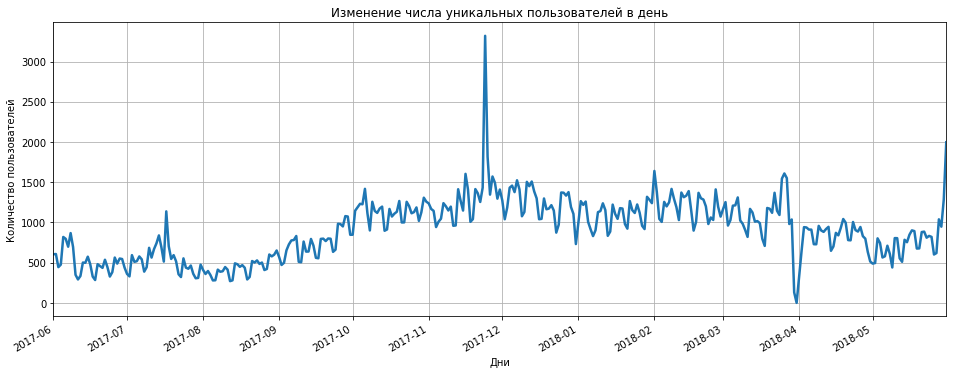

In [27]:
#напишем функцию для построения графиков
def dau_wau_mau(data, x_column, title, x_label):
    data.reset_index().plot(kind='line', x=x_column, y='uid', figsize=(16, 6), title=title, legend=False, 
                            grid=True, linewidth=2.5)
    plt.xlabel(x_label)
    plt.ylabel('Количество пользователей')
    plt.show()
    
dau_wau_mau(dau_visits, 'date', 'Изменение числа уникальных пользователей в день', 'Дни')

С начала июня до конца августа 2017 года в среднем ежедневное число посетителей Яндекс.Афиши не превышало около 500 человек, хотя иногда и наблюдались небольшие скачки. Ежедневная аудитория начала расти с начала сентября и достигла пикового значения в конце ноября. После число посетителей варьировалось между 1000 и 1500 человек в день. На графике показано, что в конце марта 2018 в один день сайт посетило 0 человек. Скорее всего, это ошибка, нужно выяснить у разработчиков, не было ли в этот день технического сбоя. С апреля 2018 года ежедневная аудитория сайта немного уменьшилась — до 500–1000 человек, хотя в конце мая зафиксирован резкий рост до 2000 человек в день. 

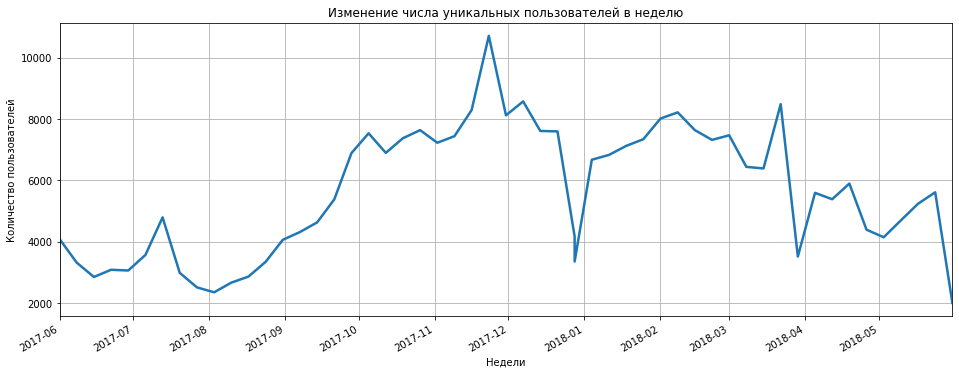

In [28]:
dau_wau_mau(wau_visits, 'week', 'Изменение числа уникальных пользователей в неделю', 'Недели')

На графике с еженедельной аудиторией сайта наблюдаем аналогичную ситуацию: рост аудитории начинается в сентябре 2017 года и достигает пика в ноябре. Здесь также заметен спад в конце декабря, его можно объяснить подготовкой к новогодним праздникам: люди больше обеспокоены поисками подарков, чем мониторингом афиши. В конце марта 2018 видим резкий спад, но затем аудитория сайта начинает расти. 

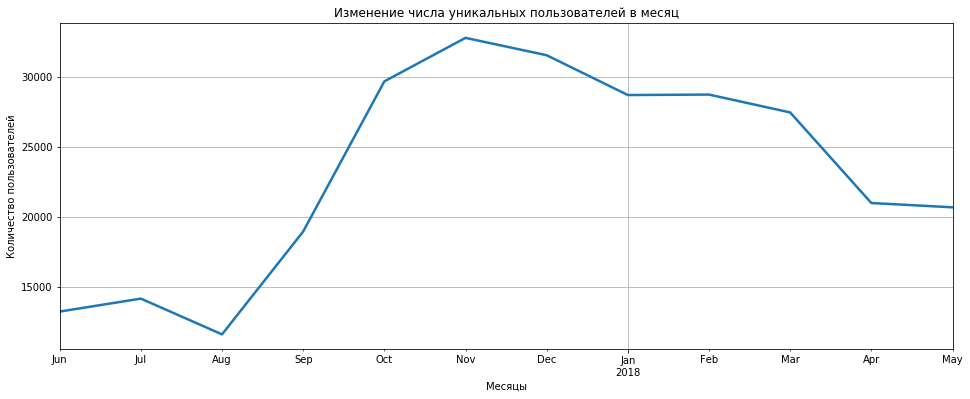

In [29]:
dau_wau_mau(mau_visits, 'month', 'Изменение числа уникальных пользователей в месяц', 'Месяцы')

На графике с количеством пользователей в месяц гораздо ярче заметны рост и спад числа аудитории сайта. Видим рост начиная с сентября 2017 года и пик в ноябре. С марта 2018 ежемесячное число пользователей начинает снижаться. 

---------------------------------------
Выясним, сколько в среднем раз в день пользователи заходят на Яндекс.Афишу, и построим график по полученным данным:

In [30]:
#сгруппируем таблицу visits по дате и вычислим, сколько раз пользователи заходили на сайт, и число уникальных просмотров
sessions_per_user = visits.groupby('date').agg({'uid':['count', 'nunique']})
#переименуем столбцы: число сессий и число уникальных посетителй
sessions_per_user.columns = ['n_sessions', 'n_users']
#сколько раз в день пользователи заходят на сайт: разделим число сессий на число уник. посетителей 
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

sessions_per_user.sample(7, random_state=1)

,n_sessions,n_users,sessions_per_user
date,,,
2018-02-06,1309,1200,1.090833
2017-12-26,1496,1370,1.091971
2017-09-04,700,654,1.070336
2017-10-17,1162,1074,1.081937
2018-01-16,1218,1107,1.100271
2018-04-22,828,778,1.064267
2017-06-06,875,797,1.097867


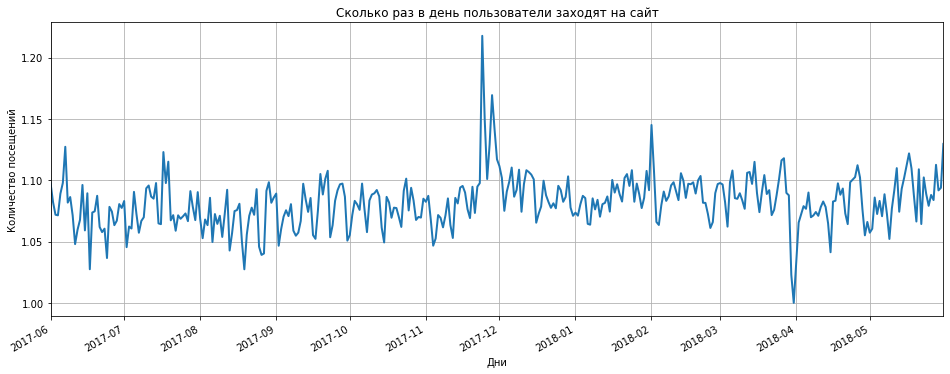

In [31]:
sessions_per_user['sessions_per_user'].plot(kind='line', figsize=(16, 6), grid=True, 
                                            title='Сколько раз в день пользователи заходят на сайт', linewidth=2)
plt.xlabel('Дни')
plt.ylabel('Количество посещений')
plt.show()

В среднем пользователи заходят на Яндекс.Афишу чаще одного раз в день: в большинстве случаев диапазон варьируется от 1,05 до 1,10 просмотра в день. Снова наблюдаем пик в конце ноября 2017 года и резкий спад в конце марта 2018 года. В целом, с декабря 2017 число посещений увеличилось до 1,07–1,11 в день. 

--------------------------------
Проверим, сколько времени пользователи проводят на сайте.

In [32]:
#вычислим разницу между концом сессии и ее началом, приведем результат к формату секунд
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.sample(5, random_state=1)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration_sec
76822,desktop,2017-09-11 16:57:00,1,2017-09-11 15:53:00,17030528792926543083,2017-01-01,2017-09-01,2017-09-07,2017-09-11,3840
59137,desktop,2018-03-06 18:53:00,3,2018-03-06 18:48:00,15504106034719496705,2018-01-01,2018-03-01,2018-03-01,2018-03-06,300
233807,desktop,2017-12-04 19:59:00,4,2017-12-04 19:58:00,5990672620451906345,2017-01-01,2017-12-01,2017-11-30,2017-12-04,60
358990,desktop,2018-04-12 11:53:19,1,2018-04-12 11:53:00,9779513058753223562,2018-01-01,2018-04-01,2018-04-12,2018-04-12,19
297022,desktop,2017-06-28 15:21:00,5,2017-06-28 15:20:00,15600382834079054551,2017-01-01,2017-06-01,2017-06-22,2017-06-28,60


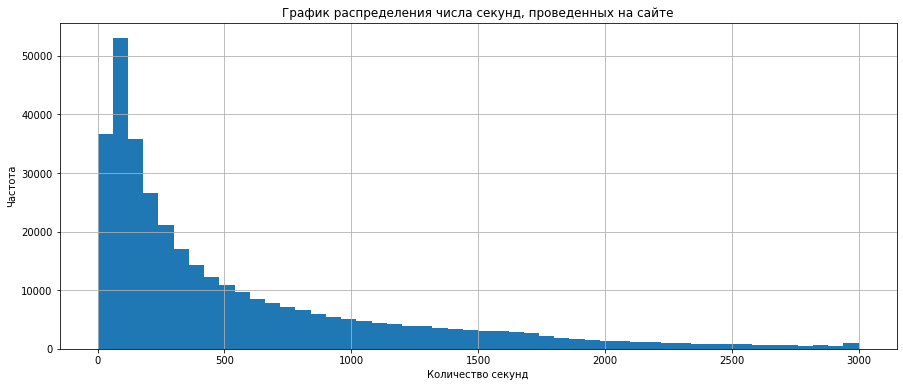

In [33]:
#построим график распределения по этому столбцу
visits['duration_sec'].plot(kind='hist', range=(0, 3000), figsize=(15, 6), bins=50, grid=True, 
                            title='График распределения числа секунд, проведенных на сайте')
plt.xlabel('Количество секунд')
plt.ylabel('Частота')
plt.show()

Судя по графику, распределение значений в столбце [duration_sec] ненормальное, а экспоненциальное. Поэтому для вычисления среднего значения времени, проведенного на сайте, лучше использовать моду — наиболее часто встречающееся значение:

In [34]:
visits['duration_sec'].mode()

0    60
dtype: int64

В среднем пользователи проводят на сайте 1 минуту.

Посмотрим, как меняется *среднее* время, проведенное на сайте всеми пользователями, по неделям:

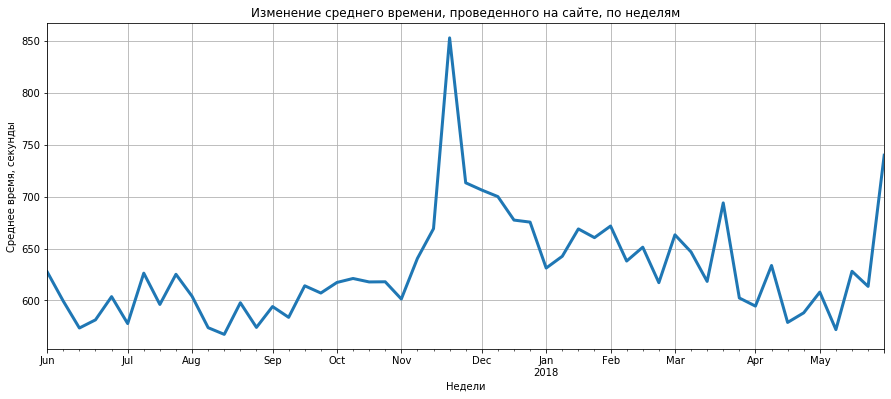

In [35]:
visits.groupby('week').agg({'duration_sec':'mean'}).plot(kind='line', figsize=(15, 6), grid=True, 
                                                       title='Изменение среднего времени, проведенного на сайте, по неделям',
                                                       legend=False, linewidth=3)
plt.xlabel('Недели')
plt.ylabel('Среднее время, секунды')
plt.show()

Существенный рост времени, проведенного на сайте, начинается в первой половине сентября. Пиковое значение снова приходится на ноябрь 2017 года. После этого общее время начинает снижаться. В конце марта снова заметен резкий спад. 

---------------------------------------
Вычислим Retention Rate — число пользователей из когорты, которые вернулись на сайт в последующие периоды. Проведем когортный анализ, возьмем период за 1 месяц.

In [36]:
#установим для каждого пользователя дату первого визита сайта
first_visit = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.sample(5, random_state=1)

,uid,first_visit
58412,4724192941756488783,2018-05-31 10:17:00
188473,15231112713607016732,2018-02-03 11:39:00
126913,10250039809385437302,2017-07-03 18:31:00
183868,14864093548463884123,2017-09-20 12:41:00
88437,7139674375760631738,2017-11-15 14:14:00


In [37]:
#соединим таблицы visits и first_visit
visits = visits.merge(first_visit, on='uid')
visits.sample(5, random_state=1)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration_sec,first_visit
76822,desktop,2017-11-30 14:52:00,4,2017-11-30 14:50:00,4749465193950236085,2017-01-01,2017-11-01,2017-11-30,2017-11-30,120,2017-11-30 14:50:00
59137,desktop,2017-12-16 09:10:00,2,2017-12-16 09:10:00,7952698129900630811,2017-01-01,2017-12-01,2017-12-14,2017-12-16,0,2017-12-15 17:05:00
233807,desktop,2018-04-04 15:46:00,4,2018-04-04 15:28:00,558673974859981437,2018-01-01,2018-04-01,2018-03-29,2018-04-04,1080,2018-04-04 15:28:00
358990,desktop,2018-02-14 14:42:00,4,2018-02-14 14:31:00,18240699123726983629,2018-01-01,2018-02-01,2018-02-08,2018-02-14,660,2018-02-14 14:31:00
297022,touch,2018-03-23 23:19:00,1,2018-03-23 23:12:00,716089720766105291,2018-01-01,2018-03-01,2018-03-22,2018-03-23,420,2018-03-23 23:12:00


In [38]:
#выделим месяцы первого визита и всех визитов
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.sample(5, random_state=1)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration_sec,first_visit,first_visit_month,visit_month
76822,desktop,2017-11-30 14:52:00,4,2017-11-30 14:50:00,4749465193950236085,2017-01-01,2017-11-01,2017-11-30,2017-11-30,120,2017-11-30 14:50:00,2017-11-01,2017-11-01
59137,desktop,2017-12-16 09:10:00,2,2017-12-16 09:10:00,7952698129900630811,2017-01-01,2017-12-01,2017-12-14,2017-12-16,0,2017-12-15 17:05:00,2017-12-01,2017-12-01
233807,desktop,2018-04-04 15:46:00,4,2018-04-04 15:28:00,558673974859981437,2018-01-01,2018-04-01,2018-03-29,2018-04-04,1080,2018-04-04 15:28:00,2018-04-01,2018-04-01
358990,desktop,2018-02-14 14:42:00,4,2018-02-14 14:31:00,18240699123726983629,2018-01-01,2018-02-01,2018-02-08,2018-02-14,660,2018-02-14 14:31:00,2018-02-01,2018-02-01
297022,touch,2018-03-23 23:19:00,1,2018-03-23 23:12:00,716089720766105291,2018-01-01,2018-03-01,2018-03-22,2018-03-23,420,2018-03-23 23:12:00,2018-03-01,2018-03-01


In [39]:
#создадим столбец с lifetime когорт
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

visits.sample(5, random_state=1)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration_sec,first_visit,first_visit_month,visit_month,cohort_lifetime
76822,desktop,2017-11-30 14:52:00,4,2017-11-30 14:50:00,4749465193950236085,2017-01-01,2017-11-01,2017-11-30,2017-11-30,120,2017-11-30 14:50:00,2017-11-01,2017-11-01,0
59137,desktop,2017-12-16 09:10:00,2,2017-12-16 09:10:00,7952698129900630811,2017-01-01,2017-12-01,2017-12-14,2017-12-16,0,2017-12-15 17:05:00,2017-12-01,2017-12-01,0
233807,desktop,2018-04-04 15:46:00,4,2018-04-04 15:28:00,558673974859981437,2018-01-01,2018-04-01,2018-03-29,2018-04-04,1080,2018-04-04 15:28:00,2018-04-01,2018-04-01,0
358990,desktop,2018-02-14 14:42:00,4,2018-02-14 14:31:00,18240699123726983629,2018-01-01,2018-02-01,2018-02-08,2018-02-14,660,2018-02-14 14:31:00,2018-02-01,2018-02-01,0
297022,touch,2018-03-23 23:19:00,1,2018-03-23 23:12:00,716089720766105291,2018-01-01,2018-03-01,2018-03-22,2018-03-23,420,2018-03-23 23:12:00,2018-03-01,2018-03-01,0


In [40]:
#создадим таблицу с месяцем первого визита, номером lifetime и числом уник. пользователей
cohort_visits = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohort_visits.sample(5, random_state=1)

,first_visit_month,cohort_lifetime,uid
68,2018-02-01,0,22197
77,2018-05-01,0,15273
44,2017-10-01,2,1357
27,2017-08-01,4,510
63,2018-01-01,0,22624


In [41]:
#создадим таблицу с изначальным числом пользователей (0-ой lifetime)
initial_users_count = cohort_visits[cohort_visits['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

#соединим две таблицы
cohort_visits = cohort_visits.merge(initial_users_count, on='first_visit_month')
cohort_visits.sample(5, random_state=1)

,first_visit_month,cohort_lifetime,uid,cohort_users
68,2018-02-01,0,22197,22197
77,2018-05-01,0,15273,15273
44,2017-10-01,2,1357,25977
27,2017-08-01,4,510,10181
63,2018-01-01,0,22624,22624


In [42]:
#в столбце retention вычислим Retention Rate
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['cohort_users']

#приведем столбец  к формату "год-месяц"
cohort_visits['first_visit_month'] = cohort_visits['first_visit_month'].dt.strftime('%Y-%m')

In [43]:
#создадим сводную таблицу с Retention Rate по когортам
cohort_visits_pivot = cohort_visits.pivot_table(index='first_visit_month', 
                                                columns='cohort_lifetime', values='retention', aggfunc='sum')
#удалим из таблицы колонку с 0-ым lifetime
cohort_visits_pivot = cohort_visits_pivot.drop(0, 1)
cohort_visits_pivot.fillna('')

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,
2017-06,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02,0.0570798,0.0254539,0.0200928,,,,,,,,


Построим тепловую карту по этой таблице:

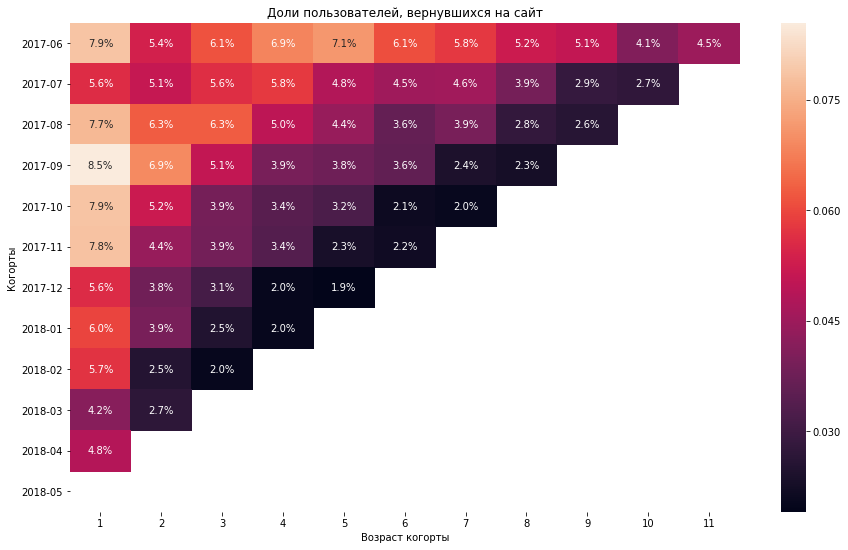

In [44]:
plt.figure(figsize=(15, 9))
plt.title('Доли пользователей, вернувшихся на сайт')
sns.heatmap(cohort_visits_pivot, annot=True, fmt='.1%')
plt.xlabel('Возраст когорты')
plt.ylabel('Когорты')
plt.show()

Вычислим также среднее значение Retention Rate на второй месяц «жизни» когорты:

In [45]:
round(cohort_visits_pivot.mean()[1] * 100, 1)

6.5

В первый месяц Retention Rate для когорт с июня по ноябрь 2017 года держался приблизительно на одном уровне: от 7,7 до 8,5 % (за исключением июля, когда коэффициент удержания составил 5,6 %). С декабря 2017 число вернувшихся в первый месяц пользователей начинает падать. С течением времени количество вернувшихся на сайт во всех когортах также имеет тенденцию уменьшаться. Во второй месяц «жизни» когорты в среднем Retention Rate составляет 6,5 %. 
<br>Исключение составляет 1 и 2 когорты — в некоторые месяцы мы наблюдаем увеличение Retention Rate. Причем рост приходится на осень 2017 года, ранее на графиках мы уже показывали увеличение числа пользователей в этот период.

**Вывод**

Мы установили, что среднее число уникальных пользователей Яндекс.Афиши в день составляет 907, в неделю — 5621, в месяц — чуть больше <br>23 тысяч человек. 
<br>Пришли к выводу, что число пользователей начало расти с сентября 2017 года и достигло пика в ноябре. После заметен постепенный спад числа посещений сайта. В среднем пользователи заходят на сайт чаще одного раза в день: от 1,05 до 1,10 просмотра в день. В ноябре 2017 также заметен резкий рост — до прибл. 1,23 ежедневных просмотров. При этом в среднем пользователи проводят на сайте 1 минуту. 
<br>После первого месяца число пользователей, вернувшихся на сайт, начинает падать. Исключение составляет когорты июня и июля 2017 года, в них заметно периодическое увеличение числа вернувшихся пользователей. Причем рост приходится на период осени 2017 года. 

### Метрики электронной коммерции

Выясним, сколько в среднем времени проходит с момента первого посещения сайта до совершения первой покупки. 

In [46]:
#узнаем время первой покупки для каждого пользователя
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns = ['uid', 'first_order']
#добавим first_order в таблицу orders
orders = orders.merge(first_order, on='uid')

orders.sample(5, random_state=1)

,buy_ts,revenue,uid,first_order
25090,2018-02-07 17:39:00,2.75,7046737606684150807,2017-11-30 11:05:00
32361,2018-01-09 21:54:00,0.49,2864948527126554286,2018-01-09 21:54:00
10615,2017-09-10 20:41:00,3.30,6199530997990685846,2017-09-10 20:41:00
34455,2018-01-25 21:29:00,0.73,7665032036013389417,2018-01-25 21:29:00
24221,2017-11-26 17:01:00,1.22,6932606255139086719,2017-11-26 17:01:00


In [47]:
#добавим в orders полученные ранее данные о первом посещении пользователя
orders = orders.merge(first_visit, on='uid')

orders.sample(5, random_state=1)

,buy_ts,revenue,uid,first_order,first_visit
25090,2018-02-07 17:39:00,2.75,7046737606684150807,2017-11-30 11:05:00,2017-11-27 14:48:00
32361,2018-01-09 21:54:00,0.49,2864948527126554286,2018-01-09 21:54:00,2018-01-09 21:53:00
10615,2017-09-10 20:41:00,3.30,6199530997990685846,2017-09-10 20:41:00,2017-09-10 20:29:00
34455,2018-01-25 21:29:00,0.73,7665032036013389417,2018-01-25 21:29:00,2017-06-06 13:27:00
24221,2017-11-26 17:01:00,1.22,6932606255139086719,2017-11-26 17:01:00,2017-11-26 17:00:00


In [48]:
#найдем время, пройденное с первого визита до первого заказа
orders['visit_order_diff'] = orders['first_order'] - orders['first_visit']
#переведем время в дни 
orders['visit_order_diff'] = orders['visit_order_diff'] / np.timedelta64(1, 'D')
orders['visit_order_diff'] = orders['visit_order_diff'].round().astype('int')

orders.sample(5, random_state=1)

,buy_ts,revenue,uid,first_order,first_visit,visit_order_diff
25090,2018-02-07 17:39:00,2.75,7046737606684150807,2017-11-30 11:05:00,2017-11-27 14:48:00,3
32361,2018-01-09 21:54:00,0.49,2864948527126554286,2018-01-09 21:54:00,2018-01-09 21:53:00,0
10615,2017-09-10 20:41:00,3.30,6199530997990685846,2017-09-10 20:41:00,2017-09-10 20:29:00,0
34455,2018-01-25 21:29:00,0.73,7665032036013389417,2018-01-25 21:29:00,2017-06-06 13:27:00,233
24221,2017-11-26 17:01:00,1.22,6932606255139086719,2017-11-26 17:01:00,2017-11-26 17:00:00,0


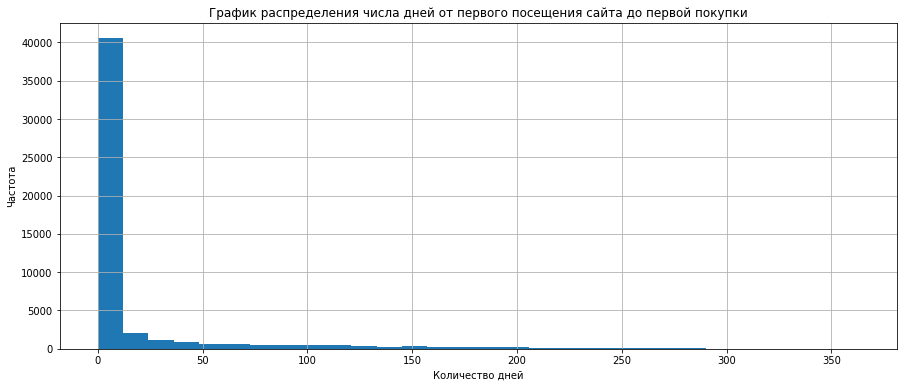

In [49]:
#построим гистрограмму для нового столбца
orders['visit_order_diff'].plot(kind='hist', figsize=(15, 6), bins=30, grid=True, 
                            title='График распределения числа дней от первого посещения сайта до первой покупки')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

По графику видно, что распределение количества минут, прошедших от первого визита на сайте до первого заказа, экспоненциальное. То есть для определения среднего значения нам нужно использовать моду:

In [50]:
orders['visit_order_diff'].mode()

0    0
dtype: int64

Значение моды показывает, что с момента первого посещения сайта до оформления первого заказа в среднем проходит 0 дней — то есть пользователи в день первого визита на сайт сразу же начинают совершать покупки. 

-------------------------------
Рассчитаем, сколько в среднем приходится покупок на одного покупателя в течение полугода.

In [51]:
#создадим столбцы с месяцем первого заказа пользователя
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
#и месяцем заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#создадим столбец в возрастом когорты
orders['age'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['age'] = orders['age'].round().astype('int')

orders.sample(5, random_state=1)

,buy_ts,revenue,uid,first_order,first_visit,visit_order_diff,first_order_month,order_month,age
25090,2018-02-07 17:39:00,2.75,7046737606684150807,2017-11-30 11:05:00,2017-11-27 14:48:00,3,2017-11-01,2018-02-01,3
32361,2018-01-09 21:54:00,0.49,2864948527126554286,2018-01-09 21:54:00,2018-01-09 21:53:00,0,2018-01-01,2018-01-01,0
10615,2017-09-10 20:41:00,3.30,6199530997990685846,2017-09-10 20:41:00,2017-09-10 20:29:00,0,2017-09-01,2017-09-01,0
34455,2018-01-25 21:29:00,0.73,7665032036013389417,2018-01-25 21:29:00,2017-06-06 13:27:00,233,2018-01-01,2018-01-01,0
24221,2017-11-26 17:01:00,1.22,6932606255139086719,2017-11-26 17:01:00,2017-11-26 17:00:00,0,2017-11-01,2017-11-01,0


In [52]:
#создадим таблицу по когортам с числом покупателей и количеством заказов
cohort_orders = orders.groupby(['first_order_month', 'age']).agg({'uid':'nunique', 'revenue':'count'})
cohort_orders.columns = ['n_buyers', 'n_orders']
#вычислим среднее число заказов на пользователя
#поделим число заказов на кол-во пользователей в когорте
cohort_orders['orders_count_mean'] = cohort_orders['n_orders'] / cohort_orders['n_buyers'][0]
cohort_orders.head()

n_buyers  n_orders  orders_count_mean
first_order_month age                                       
2017-06-01        0        2022      2353           1.163699
                  1          61       177           0.087537
                  2          50       171           0.084570
                  3          54       224           0.110781
                  4          87       291           0.143917

In [53]:
#создадим сводную таблицу по когортам со средним числом заказов
res = cohort_orders.pivot_table(index='first_order_month', columns='age', values='orders_count_mean', aggfunc='mean')
#применим метод cumsum для создания накопительного среднего числа заказов
res = res.cumsum(axis=1)
res.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163699,1.25124,1.33581,1.44659,1.5905,1.69832,1.83432,1.92038,2.02522,2.10089,2.14837,2.1909
2017-07-01,1.080613,1.13007,1.18942,1.24085,1.27646,1.31701,1.34718,1.37191,1.40059,1.41246,1.43867,
2017-08-01,0.757666,0.811078,0.860534,0.900593,0.942631,0.973294,0.997527,1.0361,1.05885,1.0816,,
2017-09-01,1.449555,1.55737,1.6365,1.71761,1.75074,1.80465,1.85757,1.88526,1.91543,,,
2017-10-01,2.454995,2.61029,2.69041,2.75074,2.81454,2.86548,2.90801,2.96983,,,,
2017-11-01,2.373393,2.56627,2.65628,2.76063,2.8274,2.85658,2.90702,,,,,
2017-12-01,2.496538,2.63007,2.72997,2.8185,2.86103,2.91296,,,,,,
2018-01-01,1.870920,1.9817,2.06034,2.09199,2.13056,,,,,,,
2018-02-01,2.024728,2.13452,2.17557,2.21019,,,,,,,,


In [54]:
#найдем среднее число покупок за полгода
print('Среднее количество покупок на одного покупателя за 6 месяцев составляет {}'.format(round(res.mean()[5], 2)))

Среднее количество покупок на одного покупателя за 6 месяцев составляет 2.06


В среднем за полгода покупатель совершает на Яндекс.Афише прибл. 2 покупки.

In [55]:
print(f"Среднее кол-во покупок за весь период: {orders['revenue'].count() / orders['uid'].nunique():.2f}")

Среднее кол-во покупок за весь период: 1.38


----------------------------
Вычислим средний чек за месяц и построим график, чтобы узнать, как менялась величина во времени:

In [56]:
avg_per_month = orders.groupby('order_month').agg({'revenue':'mean'}).reset_index()
avg_per_month

,order_month,revenue
0,2017-06-01,4.061832
1,2017-07-01,5.308836
2,2017-08-01,4.857892
3,2017-09-01,5.422852
4,2017-10-01,4.930016
5,2017-11-01,4.796231
6,2017-12-01,5.863455
7,2018-01-01,4.112927
8,2018-02-01,4.841011
9,2018-03-01,5.414946


In [57]:
#приведем столбец к формату "год-месяц"
avg_per_month['order_month'] = avg_per_month['order_month'].dt.strftime('%Y-%m')

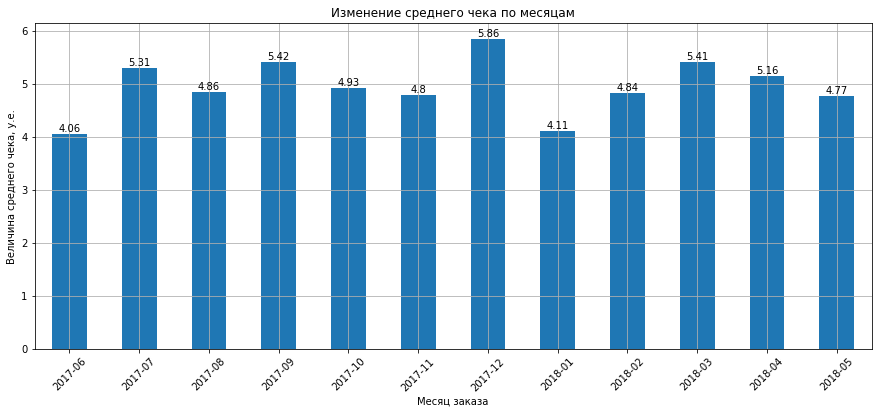

In [58]:
#построим график
plot = avg_per_month.plot(kind='bar', x='order_month', y='revenue', figsize=(15, 6), grid=True,
                  title='Изменение среднего чека по месяцам', legend=False, rot=45)
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, 1*height, round(height, 2), ha='center', va='bottom')   
plt.xlabel('Месяц заказа')
plt.ylabel('Величина среднего чека, у.е.')
plt.show()

Максимальная величина среднего чека зафиксирована в декабре 2017 года, минимальная — в июне 2017 и январе 2018 года. Затем, в феврале и марте заметен резкий рост среднего чека, а в последующие месяцы величина понемногу снижается. 

Изучим, как меняется метрика LTV — сумма, которую пользователь в среднем приносит компании со всех своих покупок. А также вычислим средний LTV на покупателя за 6 месяцев. 

In [59]:
#вычислим, сколько пользователей сделали заказы в каждый из месяцев по когортам
cohort_ltv = orders.groupby(['first_order_month', 'order_month']).agg({'uid':'nunique'}).reset_index()
cohort_ltv.head()

,first_order_month,order_month,uid
0,2017-06-01,2017-06-01,2022
1,2017-06-01,2017-07-01,61
2,2017-06-01,2017-08-01,50
3,2017-06-01,2017-09-01,54
4,2017-06-01,2017-10-01,87


In [60]:
#узнаем месяц первой покупки для каждого пользователя, используем ранее созданную переменную
first_order['first_order_month'] = first_order['first_order'].astype('datetime64[M]')
first_order.head()

,uid,first_order,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01


In [61]:
#создадим переменную с числом покупателей по когортам
cohort_size = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']
cohort_size

,first_order_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340
5,2017-11-01,4078
6,2017-12-01,4380
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3534


In [62]:
#создадим переменную с месячной суммой покупок по когортам
cohort_order_revenue = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohort_order_revenue.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [63]:
#соединим две переменные
cohort_order_revenue = cohort_order_revenue.merge(cohort_size, on='first_order_month')
cohort_order_revenue.head()

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2022
1,2017-06-01,2017-07-01,981.82,2022
2,2017-06-01,2017-08-01,885.34,2022
3,2017-06-01,2017-09-01,1931.30,2022
4,2017-06-01,2017-10-01,2068.58,2022


In [64]:
#маржинальность = 100%
margin_rate = 1.0
#вычислим валовую прибыль когорт
cohort_order_revenue['gp'] = cohort_order_revenue['revenue'] * margin_rate
#определим возраст когорт
cohort_order_revenue['age'] = ((cohort_order_revenue['order_month'] - cohort_order_revenue['first_order_month']) / 
                               np.timedelta64(1, 'M')
                              )
cohort_order_revenue['age'] = cohort_order_revenue['age'].round().astype('int')

In [65]:
#вычислим ltv когорт
cohort_order_revenue['ltv'] = cohort_order_revenue['gp'] / cohort_order_revenue['n_buyers']
cohort_order_revenue['first_order_month'] = cohort_order_revenue['first_order_month'].dt.strftime('%Y-%m')
cohort_order_revenue.head()

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv
0,2017-06,2017-06-01,9557.49,2022,9557.49,0,4.726751
1,2017-06,2017-07-01,981.82,2022,981.82,1,0.485569
2,2017-06,2017-08-01,885.34,2022,885.34,2,0.437854
3,2017-06,2017-09-01,1931.30,2022,1931.30,3,0.955143
4,2017-06,2017-10-01,2068.58,2022,2068.58,4,1.023037


In [66]:
#выведем сводную таблицу с накопительным LTV
output = cohort_order_revenue.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output = output.cumsum(axis=1)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.726751,5.21232,5.65017,6.60532,7.62835,8.36422,9.31442,9.8963,10.4498,11.0559,11.6274,11.8844
2017-07,6.013345,6.34873,6.97259,7.33175,7.50863,7.66476,7.78503,7.92693,8.08824,8.23546,8.39122,
2017-08,5.280373,5.75271,6.21153,6.60309,7.0975,7.38125,7.59207,7.99737,8.2898,8.47791,,
2017-09,5.648907,6.76736,7.2873,11.2662,11.667,12.3146,13.0168,13.2601,13.4442,,,
2017-10,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11,5.159358,5.55817,5.75787,6.08306,6.23096,6.28488,6.39989,,,,,
2017-12,4.742434,5.00299,5.92872,6.99472,7.30787,7.64614,,,,,,
2018-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02,4.156987,4.43526,4.51378,4.58792,,,,,,,,


In [67]:
#вычислим величину среднего LTV за 6 месяцев
print('Средний LTV за полгода составляет {}'.format(round(output.mean(axis=0)[5], 2)))

Средний LTV за полгода составляет 7.97


В среднем клиент за полгода приносит компании прибл. 8 у.е. со всех своих покупок.
 
Построим тепловую карту для накопительного LTV:

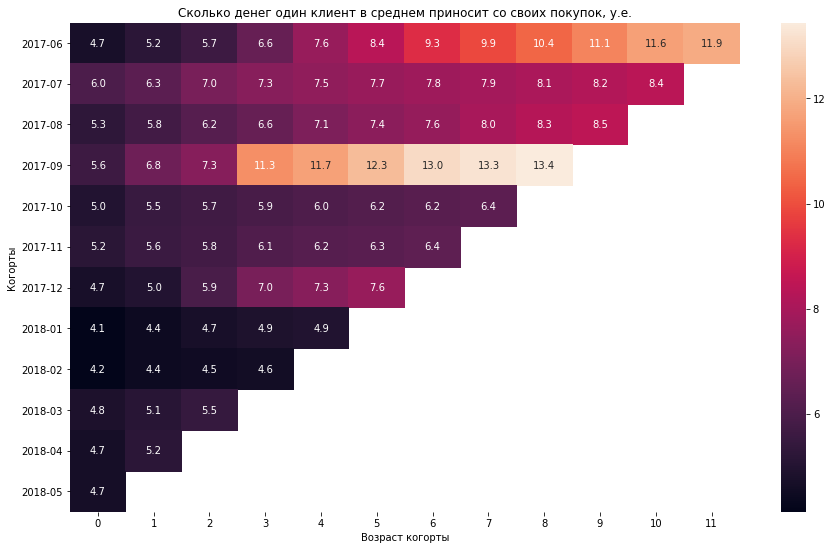

In [68]:
plt.figure(figsize=(15, 9))
plt.title('Сколько денег один клиент в среднем приносит со своих покупок, у.е.')
sns.heatmap(output, annot=True, fmt='.1f')
plt.xlabel('Возраст когорты')
plt.ylabel('Когорты')
plt.show()

Самый большой рост LTV зафиксирован в когорте пользователей, сделавших свой первый заказ в сентябре 2017 года, — скачок приходится на декабрь 2017. Далее рост был уже не таким стремительным. При этом следующие когорты (октября и ноября 2017) от месяца к месяцу показывают очень слабый рост LTV. Также хороший показатель LTV можно заметить у первой когорты от июня 2017, наибольший рост значений приходится на ноябрь и декабрь 2017 года.

**Вывод**

Проанализировали метрики электронной коммерции и определили, что в среднем пользователи начинают оформлять первые заказы в день первого посещения сайта. В среднем клиент за полгода совершает прибл. 2 покупки.
<br>Рассчитали величину среднего чека по месяцам и выяснили, что минимальное значение среднего чека было зафиксировано в июне 2017 и январе 2018. При этом максимальное значение было достигнуто месяцем ранее — в декабре 2017 года. В остальное время значение среднего чека находится в диапазоне от 4,8 до 5,4 у.е. 
<br>Также рассчитали метрику LTV и пришли к выводу, что за полгода клиент со всех своих покупок приносит компании прибл. 8 у.е. 

### Маркетинговые метрики

Выясним, как маркетинговые метрики различаются в зависимости от рекламных источников. 

Посчитаем общую сумму расходов на маркетинг:

In [69]:
print('Сумма расходов на маркетинг в период с июня 2017 до мая 2018 составила {} у.е.'.format(costs['costs'].sum()))

Сумма расходов на маркетинг в период с июня 2017 до мая 2018 составила 329131.62 у.е.


Выясним, как меняются суммарные траты на маркетинг в зависимости от рекламного источника:

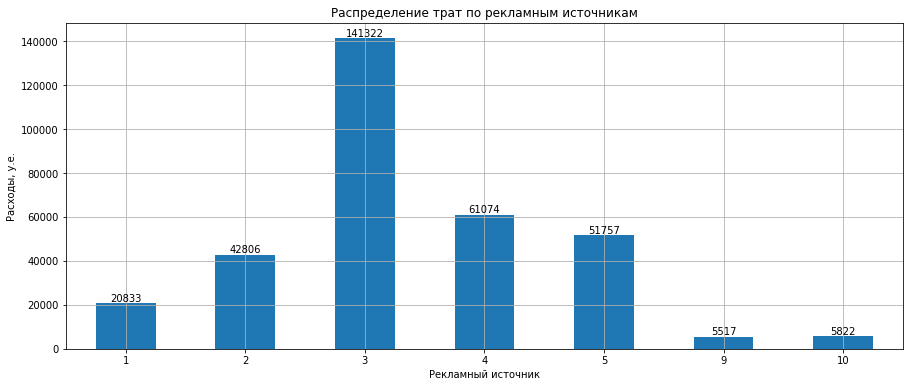

In [70]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

plot = costs_by_source.plot(kind='bar', x='source_id', y='costs', figsize=(15, 6), grid=True,
                  title='Распределение трат по рекламным источникам', legend=False, rot=0)
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, 1*height, round(height), ha='center', va='bottom')   
plt.xlabel('Рекламный источник')
plt.ylabel('Расходы, у.е.')
plt.show()

Самые большие расходы на маркетинг по источнику 3, они превышают 140 тысяч у.е. Меньше всего денег тратится на рекламные источники 9 и 10. 

Проверим, как меняются траты на привлечение пользователей в зависимости от месяца:

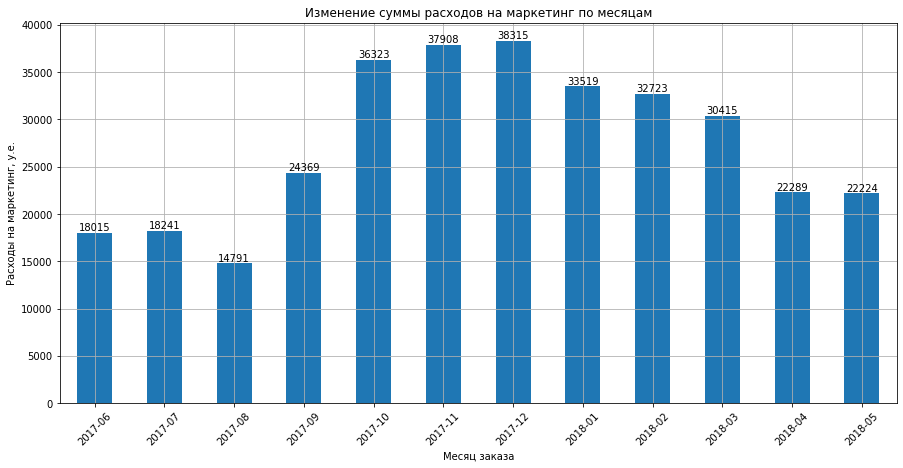

In [71]:
#создадим столбец с месяцем проведения рекламной кампании
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
costs['dt_month'] = costs['dt_month'].dt.strftime('%Y-%m')

#построим график по месяцу и суммарным затратам на рекламу 
costs_month = costs.groupby('dt_month').agg({'costs':'sum'})
plot = costs_month.plot(kind='bar', figsize=(15, 7), grid=True, legend=False, rot=45,
                                                          title='Изменение суммы расходов на маркетинг по месяцам')
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, 1*height, round(height), ha='center', va='bottom')   

plt.xlabel('Месяц заказа')
plt.ylabel('Расходы на маркетинг, у.е.')
plt.show()

В первые три месяца на рекламные кампании были потрачены наименьшие суммы. Больше всего Яндекс.Афиша тратила на маркетинг в период с октября по декабрь 2017 — от 36 до 38 тысяч у.е. Отметим, что ранее мы зафиксировали рост числа уникальных пользователей в это же время. С начала 2018 года расходы на маркетинг постепенно снижались и в апреле и мае достигли уровня в 22,000 у.е. 

------------------------------
Рассчитаем средний САС — сумма, которую компания тратит на привлечение нового клиента. Измерим эту метрику для каждого источника трафика.


In [72]:
#вычислим суммарные месячные рекламные расходы для каждого источника 
costs['month'] = costs['dt'].astype('datetime64[M]')
source_month = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
source_month.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Для каждого пользователя определим его «главный» источник — тот, с которого он в первый раз зашел на сайт:

In [73]:
first_source = visits.groupby('uid').agg({'source_id':'first'}).reset_index()
first_source.columns = ['uid', 'first_source_id']
first_source.head()

,uid,first_source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [74]:
#присоединим главные источники к таблице с заказами
orders = orders.merge(first_source, on='uid')
orders.sample(5, random_state=1)

,buy_ts,revenue,uid,first_order,first_visit,visit_order_diff,first_order_month,order_month,age,first_source_id
25090,2018-02-07 17:39:00,2.75,7046737606684150807,2017-11-30 11:05:00,2017-11-27 14:48:00,3,2017-11-01,2018-02-01,3,2
32361,2018-01-09 21:54:00,0.49,2864948527126554286,2018-01-09 21:54:00,2018-01-09 21:53:00,0,2018-01-01,2018-01-01,0,5
10615,2017-09-10 20:41:00,3.30,6199530997990685846,2017-09-10 20:41:00,2017-09-10 20:29:00,0,2017-09-01,2017-09-01,0,2
34455,2018-01-25 21:29:00,0.73,7665032036013389417,2018-01-25 21:29:00,2017-06-06 13:27:00,233,2018-01-01,2018-01-01,0,2
24221,2017-11-26 17:01:00,1.22,6932606255139086719,2017-11-26 17:01:00,2017-11-26 17:00:00,0,2017-11-01,2017-11-01,0,3


In [75]:
#вычислим общее число покупателей для первого источника и месяца первого заказа
users_count_by_source = orders.groupby(['first_source_id', 'first_order_month']).agg({'uid':'nunique'}).reset_index()
users_count_by_source.columns = ['first_source_id', 'first_order_month', 'n_buyers']
users_count_by_source.head()

,first_source_id,first_order_month,n_buyers
0,1,2017-06-01,202
1,1,2017-07-01,211
2,1,2017-08-01,145
3,1,2017-09-01,282
4,1,2017-10-01,409


In [76]:
#соединим две таблицы
monthly_costs = users_count_by_source.merge(source_month, 
                                            left_on=['first_order_month', 'first_source_id'], 
                                            right_on=['month', 'source_id'])

monthly_costs.head()

,first_source_id,first_order_month,n_buyers,source_id,month,costs
0,1,2017-06-01,202,1,2017-06-01,1125.61
1,1,2017-07-01,211,1,2017-07-01,1072.88
2,1,2017-08-01,145,1,2017-08-01,951.81
3,1,2017-09-01,282,1,2017-09-01,1502.01
4,1,2017-10-01,409,1,2017-10-01,2315.75


In [77]:
#вычислим cac
monthly_costs['cac'] = monthly_costs['costs'] / monthly_costs['n_buyers']
monthly_costs.head()

,first_source_id,first_order_month,n_buyers,source_id,month,costs,cac
0,1,2017-06-01,202,1,2017-06-01,1125.61,5.572327
1,1,2017-07-01,211,1,2017-07-01,1072.88,5.084739
2,1,2017-08-01,145,1,2017-08-01,951.81,6.564207
3,1,2017-09-01,282,1,2017-09-01,1502.01,5.326277
4,1,2017-10-01,409,1,2017-10-01,2315.75,5.661980


Вычислим среднее значение САС по всему проекту: 

In [78]:
print('Средняя стоимость привлечения клиента: {}'.format(round(monthly_costs['cac'].mean(), 2)))

Средняя стоимость привлечения клиента: 7.91


Определим также, какое число пользователей приходит с каждого источника трафика:

In [79]:
monthly_costs.groupby('first_source_id').agg({'n_buyers':'sum'}).sort_values(by='n_buyers')

,n_buyers
first_source_id,
10,1239
9,1415
1,3740
2,4320
5,6838
3,9134
4,9821


Наименьшее число пользователей у источников 9 и 10 — от 1,2 до 1,4 тысяч человек, количество пользователей источников 3 и 4 провышает это значение примерно в 7 раз — по 9,1 и 9,8 тысяч человек, соответственно. 

In [80]:
#создадим сводную таблицу для САС по источникам
monthly_costs_pivot = monthly_costs.pivot_table(index='month', columns='source_id', values='cac', aggfunc='mean')
monthly_costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,5.572327,8.957122,13.469774,8.428777,7.109022,2.769126,3.611724
2017-07-01,5.084739,9.078249,17.362828,7.233053,7.439553,4.033867,7.170000
2017-08-01,6.564207,11.914803,21.184621,9.779210,6.602054,2.963452,6.285676
2017-09-01,5.326277,9.631161,15.399614,8.906106,6.579726,3.996346,6.774559
2017-10-01,5.661980,9.728916,15.219768,5.805461,6.214871,3.502356,3.283979
2017-11-01,5.397704,10.169922,16.577741,4.790062,9.627610,3.614709,7.138378
2017-12-01,5.111790,9.603529,14.227649,5.958472,7.957344,3.987758,8.073250
2018-01-01,6.487181,12.121691,17.483802,5.832790,8.302195,4.885357,7.061494
2018-02-01,6.389797,11.805646,14.638436,5.486993,7.546592,4.754310,3.816508


Построим график изменений среднего САС по месяцам: 

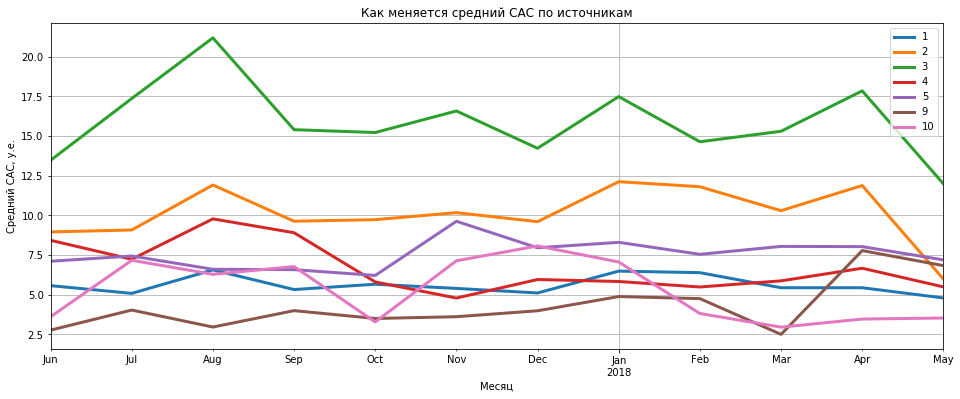

In [81]:
monthly_costs_pivot.plot(figsize=(16, 6), grid=True, title='Как меняется средний САС по источникам', 
                         label='Источник', linewidth=3)
plt.xlabel('Месяц')
plt.ylabel('Средний САС, у.е.')
plt.legend()
plt.show()

Компания тратит наибольшую сумму денег на привлечение новых клиентов по рекламному источнику 3. Чуть меньше расходов приходится на источник 2. На источники 1, 4, 5 и 10 траты распределены примерно в равной степени, хоть и неравномерно — за резким повышением трат в следующем месяце может пойти спад. Меньше всего обходится привлечение клиентов по источнику трафика 9. 

-------------------
Вычислим ROMI (возврат на маркетинговые инвестиции) по когортам для каждого источника. 
<br>Построим тепловые карты, отражающие окупаемость во времени. Также сравним показатели ROMI по каждому из источников за полгода. 

In [82]:
#сохраним для каждого пользователя первый источник и первый визит на сайт 
first_source = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id':'first', 'start_ts':'first'})
first_source.head()

,source_id,start_ts
uid,,
11863502262781,3,2018-03-01 17:27:00
49537067089222,2,2018-02-06 15:55:00
297729379853735,3,2017-06-07 18:47:00
313578113262317,2,2017-09-18 22:49:00
325320750514679,5,2017-09-30 14:29:00


In [83]:
#создадим функцию, принимающую на вход номер рекламного источника
def romi_graph(source_id):
    source = source_id
    #сохраним покупателей, чей главный источник совпадает с source
    users = first_source.query('source_id == @source').index.values
    source_orders = orders.query('uid in @users')
    
    #вычислим общее число покупателей по месяцам заказа
    cohorts_sizes = source_orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
    cohorts_sizes = cohorts_sizes.rename(columns={'uid':'n_buyers'})

    #вычислим общую сумму заказов по месяцам
    cohorts = source_orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
    cohorts = cohorts.merge(cohorts_sizes, on='first_order_month')

    #маржинальность = 100%
    margin_rate = 1.0
    #вычислим валовую прибыль когорт за месяц, возраст когорт и ltv
    cohorts['gp'] = cohorts['revenue'] * margin_rate
    cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')
    cohorts['age'] = cohorts['age'].round().astype('int')
    cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers']
    cohorts['first_order_month'] = cohorts['first_order_month'].dt.strftime('%Y-%m')
    #построим сводную таблицу с накопительным значением ltv
    cohorts_pivot = cohorts.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
    cohorts_pivot = cohorts_pivot.cumsum(axis=1)

    #сохраним затраты только по нужному источнику
    source_costs = costs.query('source_id == @source')
    #вычислим месячные затраты
    costs_cohorts = source_costs.groupby('month').agg({'costs':'sum'})
    #соединим две таблицы
    costs_cohorts = costs_cohorts.join(cohorts_sizes.set_index('first_order_month'))
    #вычислим cac
    costs_cohorts['cac'] = costs_cohorts['costs'] / costs_cohorts['n_buyers']

    #вычислим romi
    romi = cohorts_pivot.div(costs_cohorts['cac'], axis=0)

    #построим тепловую карту
    plt.figure(figsize=(15, 9))
    plt.title('Величина ROMI по источнику {}'.format(source))
    sns.heatmap(romi, annot=True, fmt='.2f')
    plt.xlabel('Возраст когорты')
    plt.ylabel('Когорты')
    plt.show()    
    
    print('Средний ROMI для всех когорт по {} источнику за полгода:'.format(source), round(romi.mean(axis=0)[5], 2))

Из предыдущего этапа мы узнали номера источников, по которым есть данные о затратах. Выведем тепловые карты и среднюю величину ROMI за полгода. 

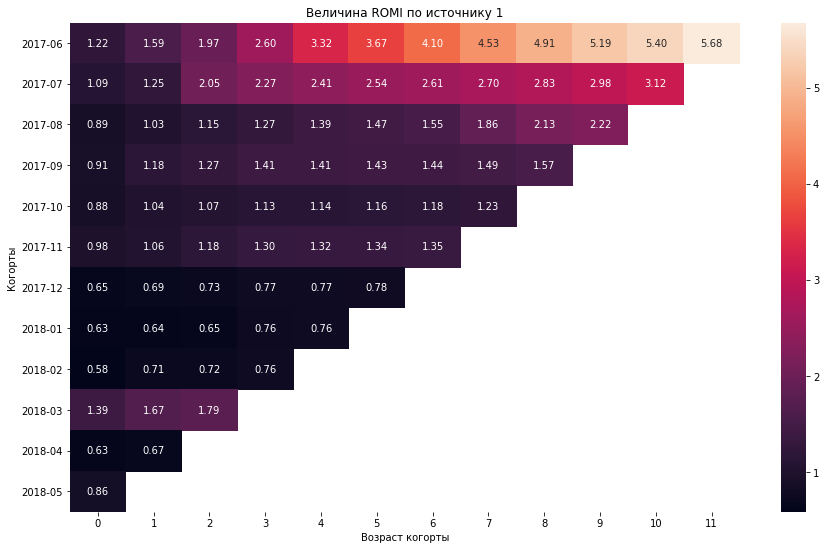

Средний ROMI для всех когорт по 1 источнику за полгода: 1.77


In [84]:
romi_graph(1)

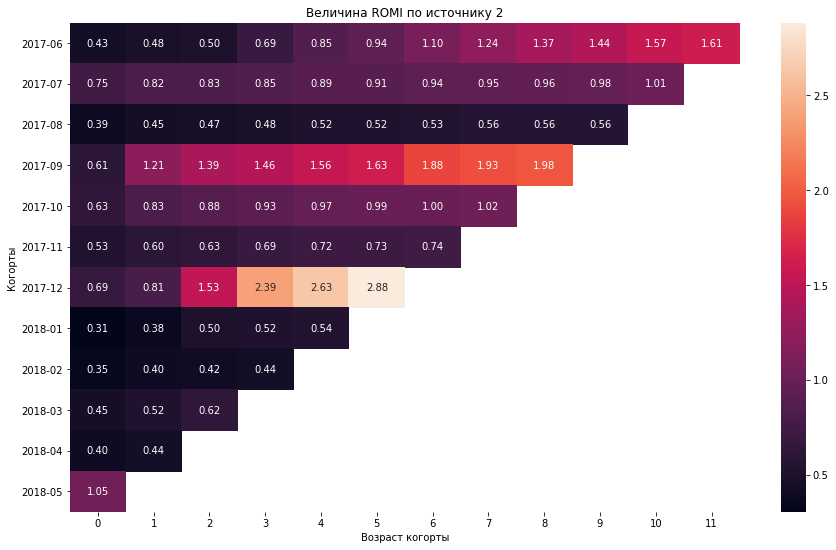

Средний ROMI для всех когорт по 2 источнику за полгода: 1.23


In [85]:
romi_graph(2)

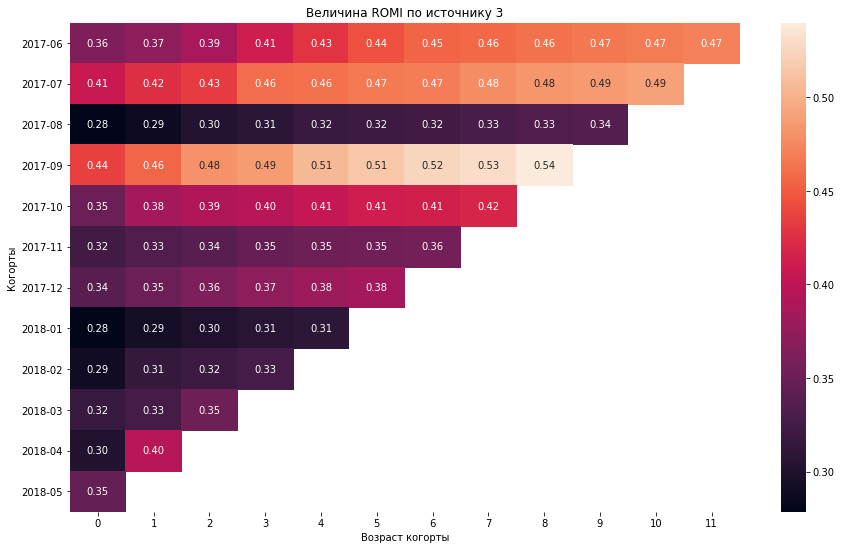

Средний ROMI для всех когорт по 3 источнику за полгода: 0.41


In [86]:
romi_graph(3)

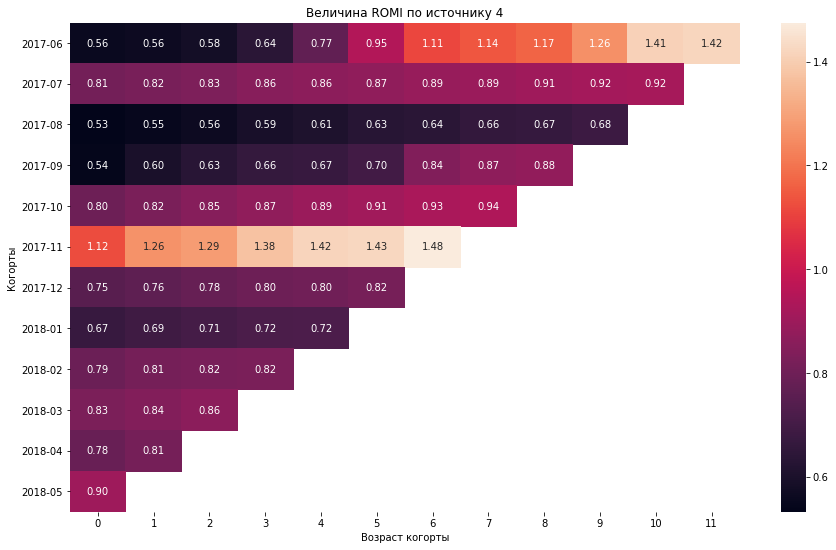

Средний ROMI для всех когорт по 4 источнику за полгода: 0.9


In [87]:
romi_graph(4)

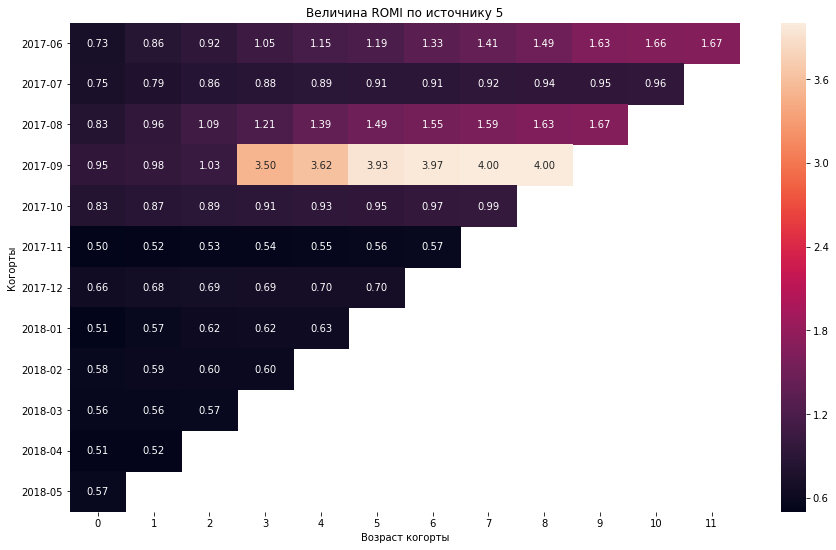

Средний ROMI для всех когорт по 5 источнику за полгода: 1.39


In [88]:
romi_graph(5)

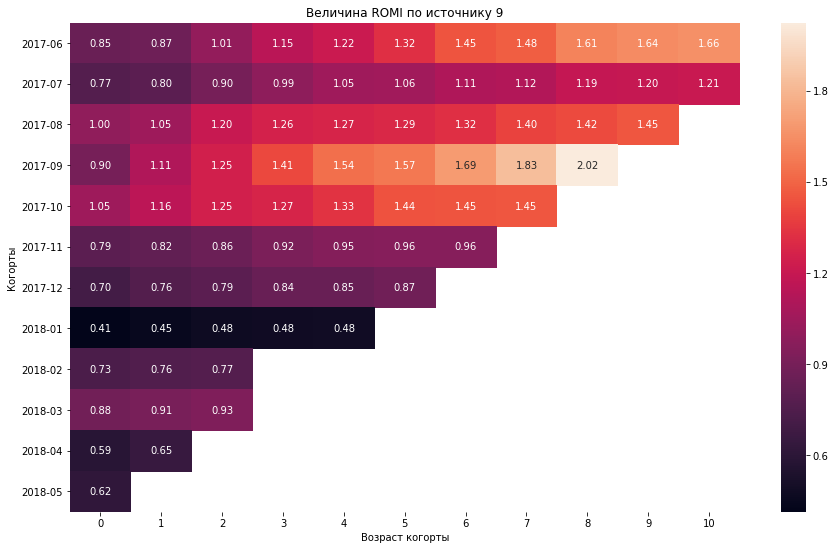

Средний ROMI для всех когорт по 9 источнику за полгода: 1.22


In [89]:
romi_graph(9)

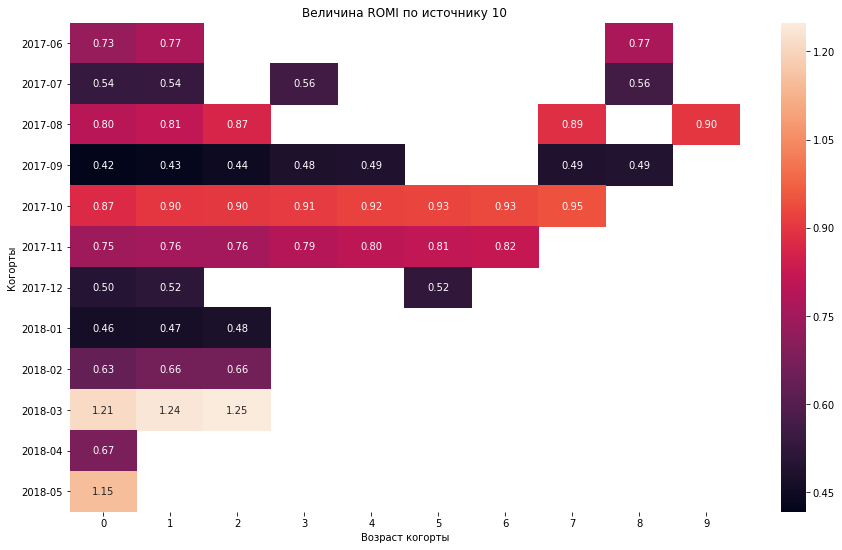

Средний ROMI для всех когорт по 10 источнику за полгода: 0.75


In [90]:
romi_graph(10)

Выявили окупаемость за полгода только по четырем источникам: 1, 2, 5 и 9. При этом по 1 источнику средний показатель ROMI за 6 месяцев самый высокий. Не окупились затраты по источникам 3, 4 и 10. У источника 3 самый низкий показатель — ROMI равен 0,4 за полгода. 
<br>Самые высокие показатели ROMI по когортам зафиксировали у источников 1 и 5. У источника 1 июньская когорта за год достигла окупаемости в 5,68. ROMI сентябрьской когорты по источнику 5 за 7 месяцев равен 4. Но к 8-му месяцу жизни ROMI не увеличился. 
<br>Затраты по источнику 3 ни в одной из когорт не окупились. 

**Вывод**

Сумма расходов Яндекс.Афиши на маркетинг за год составила почти 330 тысяч у.е. В летние месяцы 2017 года на привлечение клиентов тратилось прибл. по 15–18 тысяч у.е., но уже в октябре эта сумма увеличилась в 2 раза и к декабрю достигла 38,000 у.е. в месяц. С начала 2018 года рекламные расходы начали постепенно снижаться.
<br>На рекламный источник 3 компания тратит больше всего — 140 тысяч за весь выбранный период. Самые маленькие расходы приходятся на источники 9 и 10. Наибольшие показатели САС у источников 3 и 2. В 2 раза меньше компания тратит на привлечение новых клиентов из источников 1, 4, 5, 9 и 10. Среднее значение САС по всему проекту составляет 7,9 у.е. 
<br>Лучше всего окупаются затраты по источникам 1 и 5. За полгода источники 3, 4 и 10 не окупились вовсе.

## Выводы и рекомендации

В исследовании мы работали с данными Яндекс.Афиши с июня 2017 до конца мая 2018 года. Мы располагали данными о посещениях сайта, информацией о заказах и рекламных тратах за этот период. Перед нами стояла задача проанализировать данные и помочь маркетинговому отделу скорректировать расходы и перераспределить бюджет.

Исходя из полученных результатов анализа, мы рекомендуем обратить внимание на рекламный источник 1. Яндекс.Афиша тратит на его маркетинг прибл. 20,000 у.е. в год, при этом из всех источников он имеет самый высокий показатель окупаемости. В когортах июня, июля и марта траты на рекламу по источнику 1 окупились в первый же месяц.
<br>Стоит также отметить источник 9. Когорты с июньской по октябрьскую окупились ко 2–3 месяцу. При этом затраты на рекламу в источнике 9 одни из самых низких — 5,5 тысяч у.е. за рассматриваемый период. 

Маркетинговому отделу стоит обратить внимание на низкие показатели окупаемости источников 3 и 4. На рекламу в источнике 3 компания тратит наибольшую сумму — 141 тысячу у.е. в год. При этом показатели ROMI у источника самые низкие, за полгода средний ROMI всех когорт составил всего 0,41. У источника 4 окупаемость чуть выше: она достигла 0,9 за 6 месяцев. По расходам на рекламу источник 4 находится на втором месте — тратится более 61 тысячи у.е. в год. 

Такие высокие траты на рекламу в источниках 3 и 4 объяснимы: от них на сайт переходит наибольшее число пользователей. В общей сложности с обоих источников заказы оформили почти 19 тысяч покупателей. Но низкие показатели окупаемости говорят о том, что стоит пересмотреть рекламные кампании в этих источниках. 
<br>Хотя с источников 1 и 9 приходит меньшее число покупаетелей (3,7 тысяч и 1,4 тысяч человек, соответственно), затраты на рекламу окупаются, причем в гораздо меньшие сроки. 

Среднее ежедневное число уникальных пользователей Яндекс.Афиши — 907 человек. В неделю в среднем сайт посещают 5621 человек, в месяц — 23,228 человек. Проанализировали изменение этих метрик во времени у установили, что наибольшее число уникальных посетителей было в период с октября по декабрь 2017 года. 

В среднем пользователь заходит на сайт больше 1 раза в день — показатель находится в диапазоне от 1,05 до 1,1 просмотров в день. Максимальное число просмотров было зафиксировано осенью — пик был достигнут в конце ноября с 1,23 ежедневных просмотров. При этом в среднем пользователь проводит на сайте 1 минуту. Опять же, в ноябре пользователи провели на сайте больше всего времени.
<br>Доля вернувшихся на сайт пользователей после первого месяца начинает падать. Однако, в нескольких когортах было замечено увеличение числа вернувшихся пользователей осенью 2017 года.

Также мы выяснили, что в среднем пользователи начинают совершать свои первые покупки при первом же посещении сайта. В среднем покупатель оформляет на Яндекс.Афише 2 заказа в течение 6 месяцев. 
<br>Величина среднего чека находится в диапазоне от 4 до 5,8 у.е. Минимальное значение было замечено в июне и январе, максимальное — в декабре. Рассчитали метрику LTV и установили, что в среднем за полгода пользователь приносит компании 8 у.е. со своих покупок.

На маркетинг компания потратила больше всего в период с октября по декабрь — месячные затраты составили от 36 до 38 тысяч у.е. Однако с начала 2018 года рекламные расходы начали постепенно снижаться. Меньше всего на рекламу было потрачено в летние месяцы 2017 года.



Наиболее перспективными когортами, на наш взгляд, являются июньская и сентябрьская. 

В июньской когорте на сайт возвращается наибольшая доля пользователей. Также в среднем клиенты этой когорты совершают большее число покупок — прибл. 18 заказов за полгода. Эта когорта показала самую большую окупаемость по рекламному источнику 1 уже в первом месяце. 
<br>Пользователи сентябрьской когорты в среднем приносят компании наибольшую сумму денег со своих покупок. За полгода клиенты когорты в среднем приносит 13 у.е. Пользователи июньской когорты приносят чуть меньше денег, но в итоге сумма выше средней по всем когортам. Пользователи сентябрьской когортыь по источникам трафика 5 и 9 окупились больше остальных, причем уже ко второму–третьему месяцу. 